$\textbf{Empirical Exercise-Week 9}$  Econometric analysis of stock market dynamics. File: shanghai.csv. Text:p. 632, 14.36

In [1]:
clear all

In [2]:
Tab1 = readtable('shanghai.csv');

In [3]:
who


Your variables are:

Tab1  




In [3]:
date1 = table2array(Tab1(:,1)); date1 = datetime(date1); returns = table2array(Tab1(:,2));


ans =

        5064           1




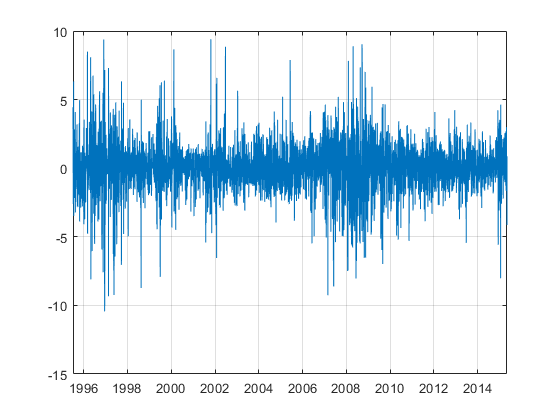

In [4]:
plot(date1, returns); grid;
size(returns)

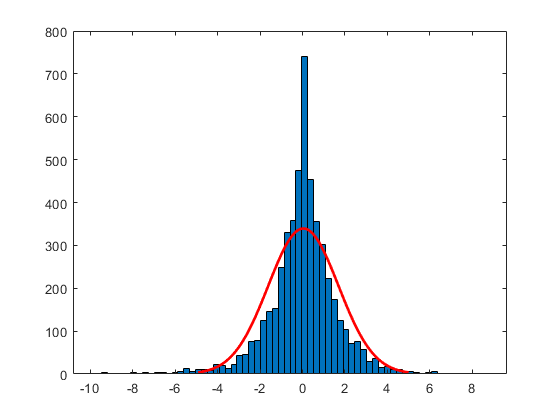

In [5]:

histfit(returns);

Notice the excess kurtosis and fat tails (skewness)

In [6]:
[h, pval]= jbtest(returns);

> In jbtest (line 136)



In [7]:
[h pval]



ans =

    1.0000    0.0010




Reject normality hypothesis for returns.  

In [8]:
help garch

 GARCH Create a GARCH conditional variance model
 
  Syntax:
 
    Mdl = garch(P,Q)
    Mdl = garch(param1,val1,param2,val2,...)
 
  Description:
 
    Create a GARCH(P,Q) conditional variance model by specifying either 
    the degrees P and Q (short-hand syntax) or a list of parameter
    name-value pairs (long-hand syntax). Either syntax creates a GARCH(P,Q)
    model of the form
 
    v(t) = c + g1*v(t-1) + ... + gP*v(t-P) + a1*e(t-1)^2 + ... + aQ*e(t-Q)^2
 
    for conditional variances v(t) and model innovations e(t).
 
  Input Arguments (Short-Hand Syntax):
 
    P - Nonnegative integer number of lagged conditional variances.
 
    Q - Nonnegative integer number of lagged squared innovations.
 
  Input Arguments (Parameter Name/Value Pairs):
 
    'Constant'  Positive scalar constant c of the model. If unspecified, 
                the constant is set to NaN.
 
    'GARCH'     A cell vector of nonnegative conditional variance 
                coefficients. When specified without

In [9]:
Mdl = garch(1,1);

In [10]:
 [EstMdl,EstParamCov,logL,info] = estimate(Mdl,returns);

 
    GARCH(1,1) Conditional Variance Model (Gaussian Distribution):
 
                 Value      StandardError    TStatistic      PValue  
                ________    _____________    __________    __________

    Constant    0.027216      0.0028221        9.6436      5.2301e-22
    GARCH{1}     0.92962      0.0020621        450.81               0
    ARCH{1}     0.061829      0.0024793        24.938      2.854e-137




In [11]:
EstMdl



EstMdl = 

  garch with properties:

     Description: "GARCH(1,1) Conditional Variance Model (Gaussian Distribution)"
    Distribution: Name = "Gaussian"
               P: 1
               Q: 1
        Constant: 0.0272155
           GARCH: {0.92962} at lag [1]
            ARCH: {0.0618285} at lag [1]
          Offset: 0



In [111]:

help garch


 GARCH Create a GARCH conditional variance model
 
  Syntax:
 
    Mdl = garch(P,Q)
    Mdl = garch(param1,val1,param2,val2,...)
 
  Description:
 
    Create a GARCH(P,Q) conditional variance model by specifying either 
    the degrees P and Q (short-hand syntax) or a list of parameter
    name-value pairs (long-hand syntax). Either syntax creates a GARCH(P,Q)
    model of the form
 
    v(t) = c + g1*v(t-1) + ... + gP*v(t-P) + a1*e(t-1)^2 + ... + aQ*e(t-Q)^2
 
    for conditional variances v(t) and model innovations e(t).
 
  Input Arguments (Short-Hand Syntax):
 
    P - Nonnegative integer number of lagged conditional variances.
 
    Q - Nonnegative integer number of lagged squared innovations.
 
  Input Arguments (Parameter Name/Value Pairs):
 
    'Constant'  Positive scalar constant c of the model. If unspecified, 
                the constant is set to NaN.
 
    'GARCH'     A cell vector of nonnegative conditional variance 
                coefficients. When specified without

In [12]:
[V RETURNS] = simulate(EstMdl,length(returns));

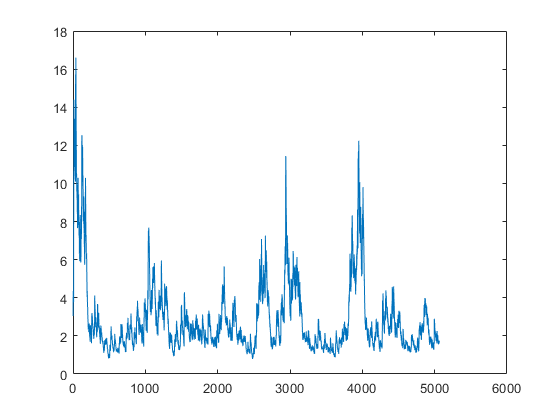

In [13]:
plot(V);

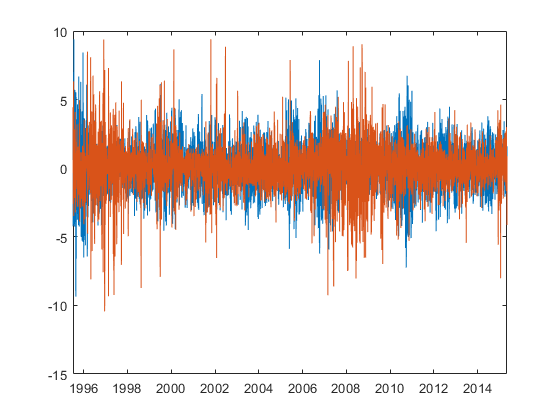

In [14]:
plot(date1, [RETURNS returns]);

In [15]:
ehat = returns - RETURNS;
zhat = ehat ./ sqrt(V);

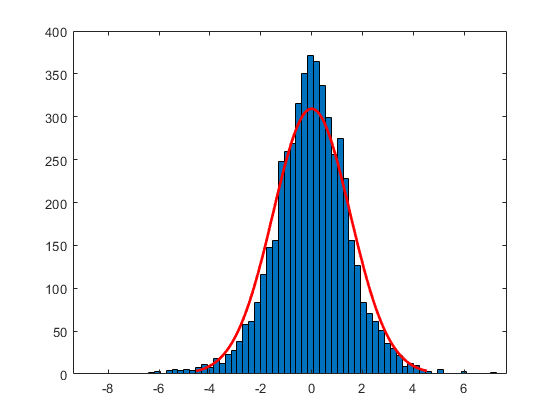

In [16]:
histfit(zhat)

In [17]:
[h pval]= jbtest(zhat);

> In jbtest (line 136)



In [122]:
h


h =

     1




In [18]:
pval


pval =

   1.0000e-03




In [19]:

[EstMdl1, EstParamCov1, logL1, info1] = estimate(Mdl, returns./(V.^.5));
% Bollerslev - Wooldridge Robust Standard Errors.


 
    GARCH(1,1) Conditional Variance Model (Gaussian Distribution):
 
                 Value      StandardError    TStatistic      PValue   
                ________    _____________    __________    ___________

    Constant    0.010785     0.00090596        11.904       1.1251e-32
    GARCH{1}     0.91634      0.0018464         496.3                0
    ARCH{1}     0.077822        0.00268        29.038      2.1577e-185




In [20]:
Mdl2 = egarch('GARCHLags',1,'ARCHLags',1, 'LeverageLags',1); 


In [21]:
[EstMdl2, EstParamCov2, logL2, info2] = estimate(Mdl2, returns);

 
    EGARCH(1,1) Conditional Variance Model (Gaussian Distribution):
 
                     Value       StandardError    TStatistic      PValue   
                   __________    _____________    __________    ___________

    Constant         0.017967      0.0011216        16.019       9.4397e-58
    GARCH{1}          0.99033     0.00099797        992.34                0
    ARCH{1}           0.11428      0.0031761        35.982      1.6225e-283
    Leverage{1}    -0.0072767      0.0027599       -2.6366        0.0083735




In [22]:
[V2 RETURNS2] = simulate(EstMdl2,length(returns));

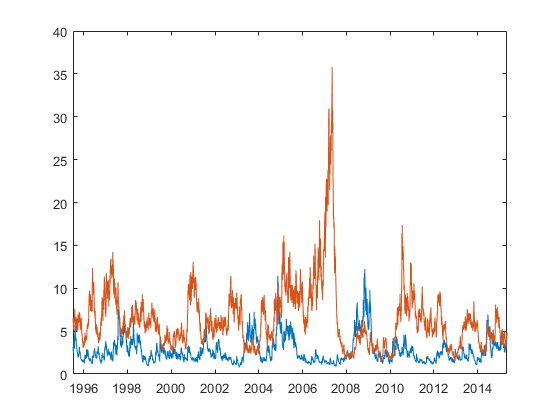

In [142]:
plot(date1, [V V2]);  % Garch vs. Egarch Returns

In [23]:
ehat2 = returns - RETURNS2;
z2 = ehat2 ./(V2.^.5);


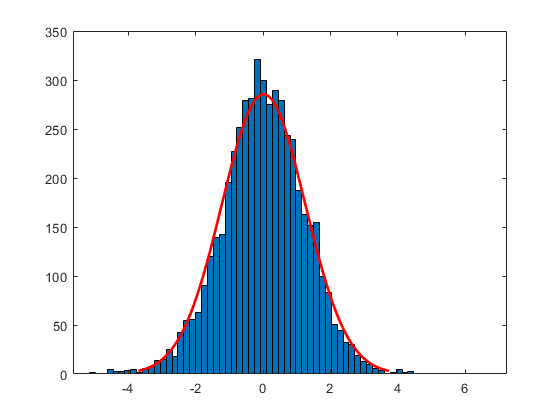

In [144]:
histfit(z2)

In [24]:
[h, p]= jbtest(z2)

> In jbtest (line 136)

h =

     1


p =

   1.0000e-03




Still not normal, when divided by std error


In [25]:
[EstMdl3, EstParamCov3, logL3, info3] = estimate(Mdl2, returns./(V2.^.5));

 
    EGARCH(1,1) Conditional Variance Model (Gaussian Distribution):
 
                     Value       StandardError    TStatistic     PValue  
                   __________    _____________    __________    _________

    Constant        0.0011815      0.0016097       0.73398        0.46296
    GARCH{1}          0.98679      0.0014306        689.79              0
    ARCH{1}           0.14687      0.0033465        43.888              0
    Leverage{1}    -0.0088429      0.0031204       -2.8339      0.0045988




Confidence intervals under the two estimates

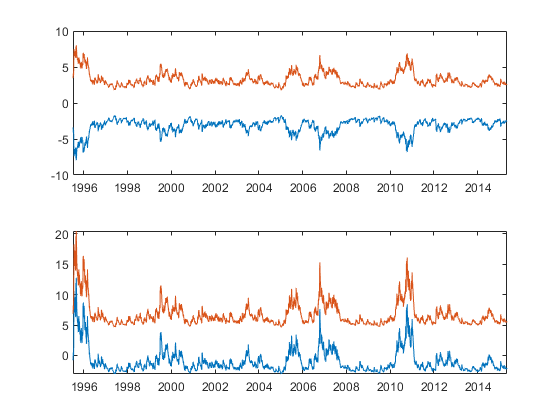

In [26]:
ymean1 = mean(returns) - 1.96 * V.^.5;
ymean2 = mean(returns) + 1.96 * V.^.5;
vol1  =  V - 1.96 * std(V);
vol2 =   V + 1.96 * std(V);
subplot(211); plot(date1, [ymean1 ymean2]); subplot(212); plot(date1, [vol1 vol2]);

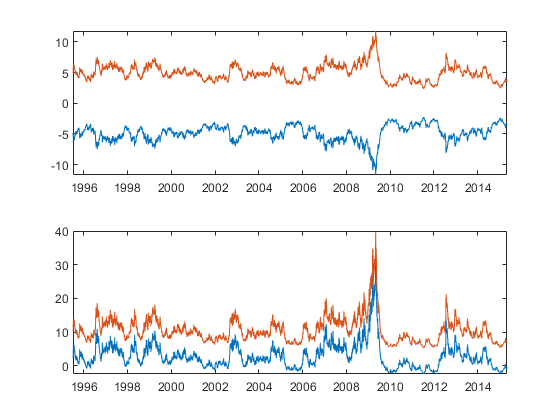

In [27]:
ymean3 = mean(returns) - 1.96 * V2.^.5;
ymean4 = mean(returns) + 1.96 * V2.^.5;
vol3  =  V2 - 1.96 * std(V);
vol4 =   V2 + 1.96 * std(V);
subplot(211); plot(date1, [ymean3 ymean4]); subplot(212); plot(date1, [vol3 vol4]);